In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books (1).csv


In [9]:
# Load the CSV files
books = pd.read_csv("/content/books.csv")
ratings = pd.read_csv("/content/ratings.csv")

In [14]:
#---content-based filtering---
books['feature'] = books['Title'] + ' ' + books['Author'] + ' ' + books['Genre']
tfidt_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidt_vectorizer.fit_transform(books['feature'])
content_similarity = cosine_similarity(tfidf_matrix)

In [15]:
book_index=0 #Harry Potter
similar_books = content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for 'Harry Potter':
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']


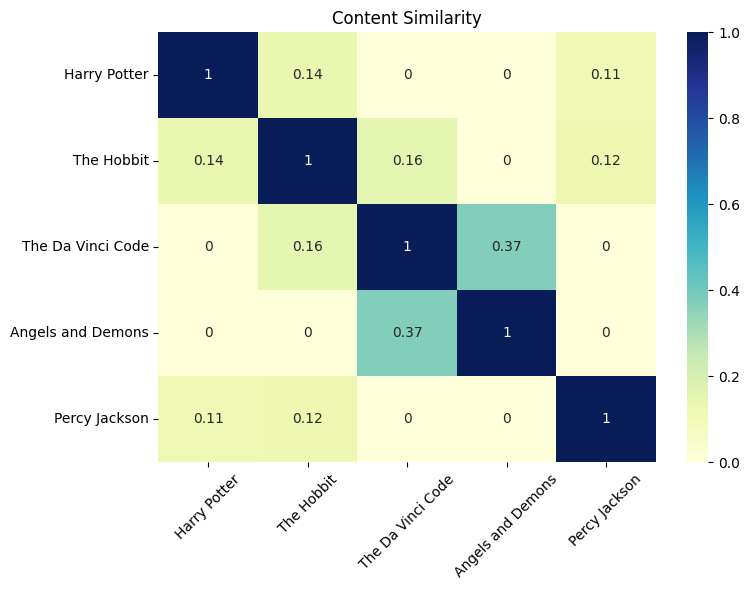

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],yticklabels=books['Title'],annot=True,cmap="YlGnBu")
plt.title("Content Similarity")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# Collaborative filtering user-item matrix
user_item_matrix = ratings.pivot_table(index='User_ID', columns='Book_ID',values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

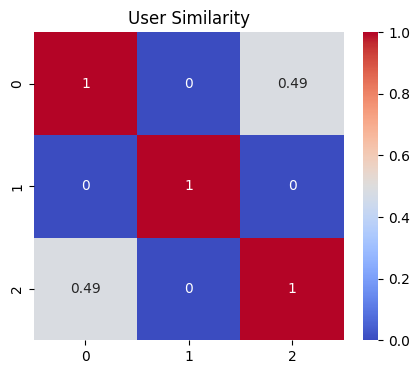

In [33]:
# Visual
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity, annot=True,cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [34]:
#User similarity
import numpy as np
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
similar_users = user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUser most similar to User 1:")
print(similar_users)


User most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [45]:
#---hybrid Rcommendation---
content_scores=content_similarity[book_index]
user_ratings=user_item_matrix.loc[1]
aligned_ratings=user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_scores = 0.6 * content_scores +  0.4 * aligned_ratings
top_indices=np.argsort(hybrid_scores)[::-1]
recommended_indices=[i for i in top_indices if i!=book_index][:3]
print("Hybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']


In [44]:
print("Hybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']
